# Chapter 2 – End-to-end Machine Learning Project

## Setup

In [1]:
# To support both python 2 and python 3

from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make the output of this notebook stable
np.random.seed(42)

# to plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

# where to save the figures
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'end_to_end_project'
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
if not os.path.isdir(IMAGE_PATH):
    os.makedirs(IMAGE_PATH)    

def save_fig(fig_id, tight_layout = True, file_extension = 'png', resolution = 300):
    path = os.path.join(IMAGE_PATH, fig_id + '.' + file_extension)
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = file_extension, dpi = resolution)

import warnings
warnings.filterwarnings(action = 'ignore', message = 'internal gelsd')

In [2]:
import os
import tarfile
from six.moves import urllib 

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
    

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


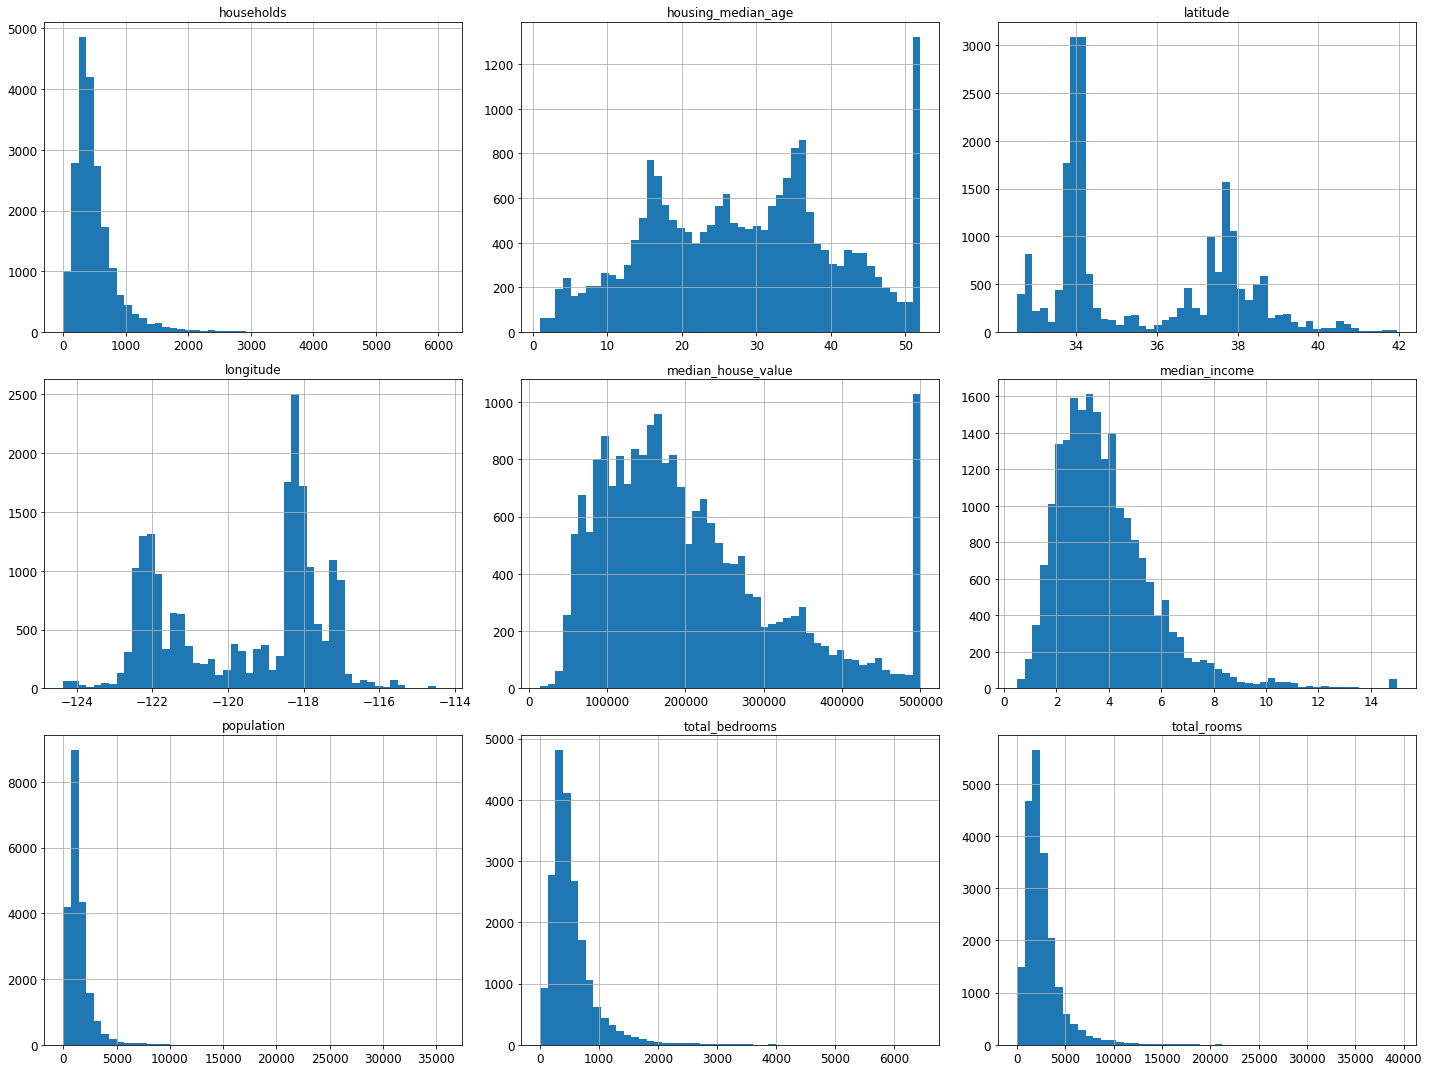

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))
save_fig('attribute_histogram_plots')
plt.show()

In [10]:
np.random.seed(42)

In [11]:
import numpy as np

# for illustration
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), 'train + ', len(test_set), 'test')

16512 train +  4128 test


In [13]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [15]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [17]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


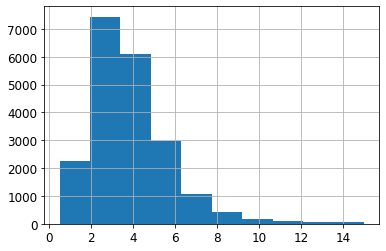

In [18]:
housing['median_income'].hist()

In [19]:
# Divide by 1.5 to limit the number of incomme categories
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
# Label those above 5 as 5
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

In [20]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [22]:
# compare if the the split is as expected, compare the in come category proportions in strat_test_set and full dataset
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [23]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [24]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    'Overall': income_cat_proportions(housing),
    'Stratified': income_cat_proportions(strat_test_set),
    'Random': income_cat_proportions(test_set)
}).sort_index()
compare_props['Rand. %error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

In [25]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [26]:
for dataset in (strat_train_set, strat_test_set):
    dataset.drop(['income_cat'], axis = 1, inplace = True)

# Discover and visualize the data to gain insights

In [27]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot


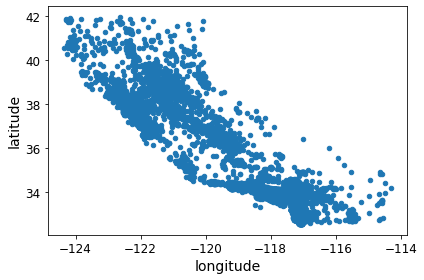

In [28]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')
save_fig('bad_visualization_plot')

Saving figure better_visualization_plot


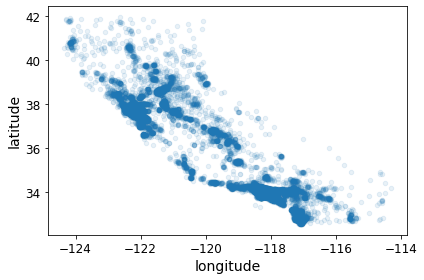

In [29]:
#  setting alpha option to visualize the places where there is a high density of data points

housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)
save_fig('better_visualization_plot')

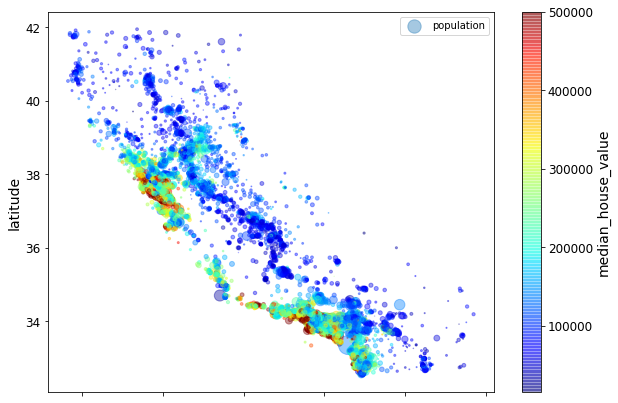

In [30]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
            s = housing['population']/100, label = 'population', figsize = (10, 7),
            c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True
            )
plt.legend()

Saving figure california_housing_prices_plot


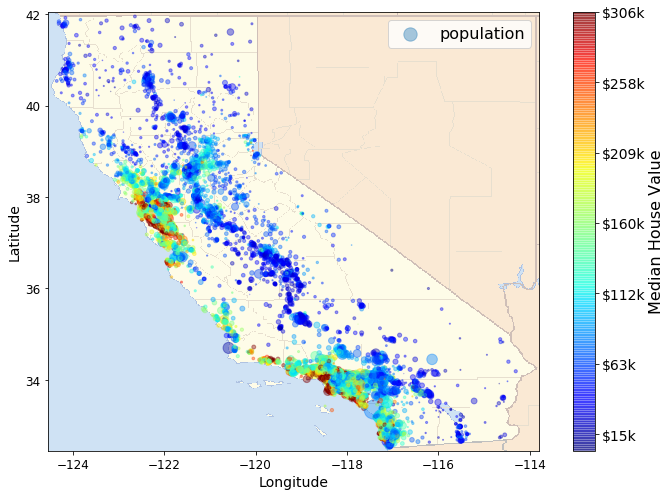

In [31]:
import matplotlib.image as mping

california_img = mping.imread(PROJECT_ROOT_DIR + '/images/end_to_end_project/california.png')
ax = housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', figsize = (10, 7), 
                 s = housing['population']/100, label = 'population',
                 c = 'median_house_value', cmap = plt.get_cmap('jet'),
                 colorbar = False, alpha = 0.4,
                 )
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5, 
           cmap = plt.get_cmap('jet'))
plt.ylabel('Latitude', fontsize = 14)
plt.xlabel('Longitude', fontsize = 14)

prices = housing['median_house_value']
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['$%dk'%(round(v/1000)) for v in tick_values], fontsize = 14)
cbar.set_label('Median House Value', fontsize = 16)

plt.legend(fontsize = 16)
save_fig('california_housing_prices_plot')
plt.show()

In [32]:
corr_matrix = housing.corr()

In [33]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


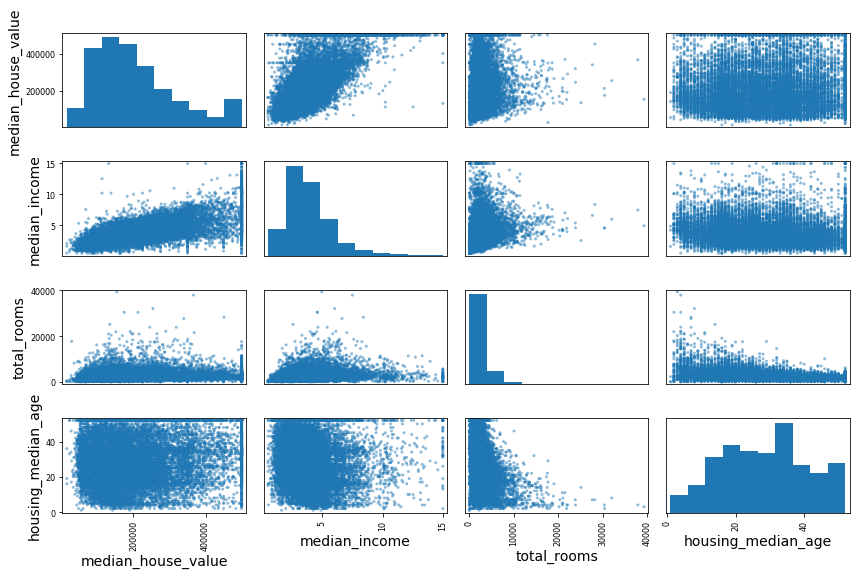

In [34]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms',
             'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig('scatter_matrix_plot')

Saving figure income_vs_house_value_scatterplot


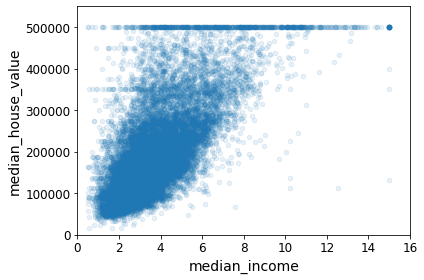

In [35]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig('income_vs_house_value_scatterplot')

In [36]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedroom_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [37]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroom_per_room           -0.259984
Name: median_house_value, dtype: float64

[0, 5, 0, 550000]

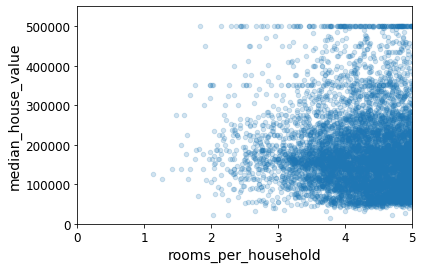

In [38]:
housing.plot(kind = 'scatter', x = 'rooms_per_household', y = 'median_house_value',
            alpha = 0.2)
plt.axis([0, 5, 0, 550000])


In [39]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedroom_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the data for ML algorithms

In [40]:
housing = strat_train_set.drop('median_house_value', axis = 1) # drop labels for training set
housing_labels = strat_train_set['median_house_value'].copy()

In [41]:
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [42]:
sample_incomplete_rows.dropna(subset = ['total_bedrooms']) # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [43]:
sample_incomplete_rows.drop('total_bedrooms', axis = 1) #option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [44]:
median = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace = True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [45]:
try:
    from sklearn.impute import SimpleImputer # sklearn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
    
imputer = SimpleImputer(strategy='median')

In [46]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [47]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [48]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [49]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [50]:
X = imputer.transform(housing_num)

In [51]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = list(housing_num.index.values))

In [52]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [53]:
imputer.strategy

'median'

In [54]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [55]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [56]:
from sklearn.preprocessing import OrdinalEncoder

In [57]:
ordinary_encoder = OrdinalEncoder()
housing_cat_encoded = ordinary_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [58]:
ordinary_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [59]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [60]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [61]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [62]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [63]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the the right column indices, safer than hard-coding indices 3,4,5,6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ('total_rooms', 'total_bedrooms', 'population', 'households')
]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self # nothin else to do
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                         bedrooms_per_room]
        else:
            return  np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [65]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room = True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, 
                     bedrooms_per_room]
    else:
        return  np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = FunctionTransformer(add_extra_features, validate=False, 
                                 kw_args = {'add_bedrooms_per_room' : False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [66]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+['rooms_per_household', 'population_per_household'])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy = 'median')),
     ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
     ('std_scaler', StandardScaler())
])
    
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [68]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [69]:
from sklearn.compose import ColumnTransformer

In [70]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [71]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [72]:
housing_prepared.shape

(16512, 16)

In [73]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [74]:
# old version pipeline

from sklearn.base import BaseEstimator, TransformerMixin

class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        return X[self.attribute_names].values

In [75]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

old_num_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attr_adder', FunctionTransformer(add_extra_features, validate=False)),
    ('std_scaler', StandardScaler())
])

old_cat_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

In [76]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', old_num_pipeline),
    ('cat_pipeline', old_cat_pipeline)
])

In [77]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [78]:
np.allclose(housing_prepared, old_housing_prepared)

True

# Select and train a model

In [79]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
# let's try the full preprocessing pipeline on a few training instances

some_data = housing.iloc[:5]
some_label = housing_labels.iloc[:5]
# cannot use fit_transform as it will transform(change) X value
# transform: Transform X using full_pipeline encoding
# fit_transform: Fit full_pipeline to X, then transform X.
some_data_prepared = full_pipeline.transform(some_data) 

print('predictions', lin_reg.predict(some_data_prepared))

predictions [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [81]:
print('labels', list(some_label))

labels [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [82]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error # L1 norm, L2 norm

housing_predictions = lin_reg.predict(housing_prepared)
lin_mae = mean_squared_error(housing_labels, housing_predictions)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [84]:
lin_mae

4709829587.97112

In [85]:
lin_rmse

68628.19819848922

In [86]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [87]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune the model

In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [89]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())
    
display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean:  71407.68766037929
Standard deviation:  2439.4345041191004


In [90]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66755.22933006 66966.17998947 70347.95244419 74769.18698807
 68031.13388938 71229.18632135 64959.86666894 68270.70746551
 71552.91566558 67665.10082067]
Mean:  69054.74595832238
Standard deviation:  2744.226569274941


In [91]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [92]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [93]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                                scoring='neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean:  52583.72407377466
Standard deviation:  2298.353351147122


In [94]:
from sklearn.externals import joblib

model_folder = './model'
if not os.path.isdir(model_folder):
    os.makedirs(model_folder)

model_path = os.path.join(model_folder, 'forest_reg.pkl')
joblib.dump(forest_reg, model_path)

# and later
forest_reg_loaded = joblib.load(model_path)

/home/ephyan/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [95]:
forest_reg_loaded.predict(some_data_prepared)

array([276490., 326860., 209860.,  47540., 230990.])

In [96]:
forest_reg.predict(some_data_prepared)

array([276490., 326860., 209860.,  47540., 230990.])

In [97]:
pd.Series(np.sqrt(-lin_scores)).describe()

count       10.000000
mean     69054.745958
std       2892.668791
min      64959.866669
25%      67140.910197
50%      68150.920677
75%      71008.877852
max      74769.186988
dtype: float64

In [98]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 7]}, 
              {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 7],


In [100]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 30}

In [101]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [102]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64911.376987917916 {'max_features': 2, 'n_estimators': 3}
55588.601420527455 {'max_features': 2, 'n_estimators': 10}
53148.91358803413 {'max_features': 2, 'n_estimators': 30}
60980.098380042204 {'max_features': 4, 'n_estimators': 3}
52783.26102285533 {'max_features': 4, 'n_estimators': 10}
50371.90263495316 {'max_features': 4, 'n_estimators': 30}
58825.566353938964 {'max_features': 6, 'n_estimators': 3}
52097.06610553582 {'max_features': 6, 'n_estimators': 10}
49947.73431526056 {'max_features': 6, 'n_estimators': 30}
58940.60341237929 {'max_features': 7, 'n_estimators': 3}
51809.589719205 {'max_features': 7, 'n_estimators': 10}
49851.310316080286 {'max_features': 7, 'n_estimators': 30}
62573.92183787568 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54271.123465350014 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60157.9680418247 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52847.6505472896 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.276353,0.061413,0.009072,0.002978,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.183599e+09,-4.113517e+09,-4.318534e+09,-4.018411e+09,-4.433412e+09,-4.213487e+09,1.471964e+08,18
1,0.779860,0.078187,0.026530,0.005742,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.946292e+09,-3.181574e+09,-3.200347e+09,-2.957971e+09,-3.164296e+09,-3.090093e+09,1.132845e+08,11
2,2.169106,0.288284,0.074373,0.023886,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.691191e+09,-2.946719e+09,-2.909999e+09,-2.602398e+09,-2.973732e+09,-2.824807e+09,1.494083e+08,9
3,0.307930,0.060335,0.008873,0.002530,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.478702e+09,-3.605196e+09,-3.844856e+09,-3.497096e+09,-4.167119e+09,-3.718572e+09,2.594478e+08,16
4,1.179640,0.089158,0.026792,0.003924,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.688014e+09,-2.858840e+09,-2.955569e+09,-2.556904e+09,-2.871043e+09,-2.786073e+09,1.437846e+08,7
5,3.152194,0.711627,0.069742,0.016210,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.384079e+09,-2.639791e+09,-2.647152e+09,-2.374805e+09,-2.640832e+09,-2.537329e+09,1.289747e+08,3
6,0.249561,0.001106,0.005030,0.000268,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.290895e+09,-3.596192e+09,-3.598887e+09,-3.225451e+09,-3.590821e+09,-3.460447e+09,1.664682e+08,13
7,0.835616,0.043044,0.013152,0.000547,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.527354e+09,-2.752607e+09,-2.990682e+09,-2.553732e+09,-2.746192e+09,-2.714104e+09,1.670904e+08,6
8,2.454859,0.038507,0.036042,0.001029,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.322282e+09,-2.533470e+09,-2.635475e+09,-2.407379e+09,-2.575314e+09,-2.494776e+09,1.141699e+08,2
9,0.275612,0.005221,0.004665,0.000128,7,3,NaN,"{'max_features': 7, 'n_estimators': 3}",-3.289899e+09,-3.588484e+09,-3.553326e+09,-3.362289e+09,-3.575998e+09,-3.473995e+09,1.234346e+08,14


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low = 1, high = 200),
    'max_features': randint(low = 1, high = 8)
}
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
#print the mean score for different parameters
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

In [ ]:
#check feature importance for the best model
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ['room_per_hhold', 'pop_per_hhold', 'bedrooms_per_rooms']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set.median_house_value.copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

In [ ]:
# compute 95% CI for the rmse
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m-1, loc = mean, scale = stats.sem(squared_errors)))

In [ ]:
# compute the confidence interval mannually
t_score = stats.t.ppf((1 + confidence) / 2, df=m - 1)
t_margin = t_score * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - t_margin), np.sqrt(mean + t_margin)

In [ ]:
# compute CI by z-scores rather than t-scores
z_scores = stats.norm.ppf((1 + confidence) / 2)
z_margin = z_scores * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - z_margin), np.sqrt(mean + z_margin)

# External material

## A full pipeline with both preparation and prediction

In [ ]:
full_pipeline_with_predictor = Pipeline([
    ('preparation', full_pipeline),
    ('linear', LinearRegression())
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

## Model persitence using joblib

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
from sklearn.externals import joblib

joblib.dump(my_model, 'my_model.pkl')
#... later
my_model_loaded = joblib.load('my_model.pkl')

## Example SciPy distributions for RandomizedSearchCV

In [ ]:
from scipy.stats import geom, expon
geom_distrib = geom(0.5).rvs(10000, random_state=42)
expon_distrib = expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins = 50)
plt.show()
plt.hist(expon_distrib, bins = 50)
plt.show()

# Exercise solution

## Question: 
Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = [{'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]}, 
          {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0], 
           'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}]

svr_reg = SVR()
grid_search = GridSearchCV(svr_reg, 
                           param_grid=params, cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=2,
                           n_jobs=10)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
rmse = np.sqrt(-grid_search.best_score_)
rmse

In [ ]:
grid_search.best_params_

## Question:
Try replacing GridSearchCV with RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 20000),
    'gamma': expon(scale=1.0)
}

svr_reg = SVR()
rnd_search = RandomizedSearchCV(svr_reg, param_distributions=param_distribs, 
                                n_iter=50, cv=5, scoring='neg_mean_squared_error', 
                                verbose=2, n_jobs=10, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
rmse = np.sqrt(-rnd_search.best_score_)
rmse

In [ ]:
rnd_search.best_params_

In [ ]:
samples = expon(scale=1.0).rvs(10000, random_state=42)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Exponential distribution (scale=1.0)')
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title('Log of this distribution')
plt.hist(np.log(samples), bins=50)
plt.show()

In [ ]:
samples = reciprocal(20, 200000).rvs(10000, random_state=42)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Reciprocal distribution (scale=1.0)')
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title('Log of this distribution')
plt.hist(np.log(samples), bins=50)
plt.show()

## Question:
Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, k):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [ ]:
k = 5

In [ ]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

In [ ]:
np.array(attributes)[top_k_feature_indices]

In [ ]:
# double check above are indeed top k features
sorted(zip(feature_importances, attributes), reverse=True)[:k]

In [ ]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [ ]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [ ]:
housing_prepared_top_k_features[:3]

In [ ]:
housing_prepared[:3, top_k_feature_indices]

## Question:
Try creating a single pipeline that does the full data preparation plus the final prediction.

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('prepare', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [ ]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

In [ ]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print('Prediction: \t', prepare_select_and_predict_pipeline.predict(some_data))
print('Labels: \t', list(some_labels))

## Question:
Automatically explore some preparation options using GridSearchCV.

In [ ]:
param_grid = [{
    'preparation_num_imputer_strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection_k': list(range(1, len(feature_importances)+1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5, 
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=10)
grid_search_prep.fit(housing, housing_labels)

In [ ]:
grid_search_prep.best_params_